In [ ]:
import numpy as np
import pandas as pd 

## **Importing the Dataset** 

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

repo_path = '/content/gdrive/My Drive/Dataset/'
data = os.path.join(repo_path, 'training.1600000.processed.noemoticon.csv')

df = pd.read_csv(data, encoding = 'latin', header=None)

df.head()

Mounted at /content/gdrive


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## **Features:**

In [ ]:
columns=df.columns
columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns=['sentiment','data']
df.head()

,sentiment,data
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
y=df['sentiment']

## **Splitting the Dataset for Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (1072000,)
DF Test Shape:  (528000,)
Y Train Shape:  (1072000,)
Y Test Shape:  (528000,)


## **Building the CNN model**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(528000, 116)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 116)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 116, 20)           10549420  
_________________________________________________________________
conv1d (Conv1D)              (None, 114, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 38, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           24704 

## **Training the model with 5 epoch**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
10720/10720 [==============================] - 1383s 129ms/step - loss: 0.4728 - accuracy: 0.7725 - val_loss: 0.4018 - val_accuracy: 0.8172
Epoch 2/5
10720/10720 [==============================] - 1385s 129ms/step - loss: 0.3874 - accuracy: 0.8260 - val_loss: 0.4011 - val_accuracy: 0.8179
Epoch 3/5
10720/10720 [==============================] - 1383s 129ms/step - loss: 0.3679 - accuracy: 0.8359 - val_loss: 0.3974 - val_accuracy: 0.8206
Epoch 4/5
10720/10720 [==============================] - 1389s 130ms/step - loss: 0.3529 - accuracy: 0.8440 - val_loss: 0.4019 - val_accuracy: 0.8181
Epoch 5/5
10720/10720 [==============================] - 1385s 129ms/step - loss: 0.3409 - accuracy: 0.8499 - val_loss: 0.4082 - val_accuracy: 0.8164


In [ ]:
y_pred=model.predict(data_test)
y_pred

array([[5.2382112e-01, 1.8574485e-10, 3.1788305e-10, 2.0239821e-10,
        4.7617882e-01],
       [7.5163895e-01, 2.4103679e-13, 7.8294435e-13, 4.0573550e-13,
        2.4836104e-01],
       [4.1448256e-01, 4.7061578e-19, 2.7444614e-18, 6.4891177e-19,
        5.8551741e-01],
       ...,
       [5.2813519e-02, 1.9433874e-17, 1.5334577e-16, 2.3367535e-17,
        9.4718647e-01],
       [9.3201089e-01, 2.0671752e-28, 1.2499670e-26, 3.6329223e-28,
        6.7989044e-02],
       [9.1189480e-01, 1.5065217e-21, 3.4903516e-20, 5.5993718e-21,
        8.8105164e-02]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 4, ..., 4, 0, 0])

## **Scores**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

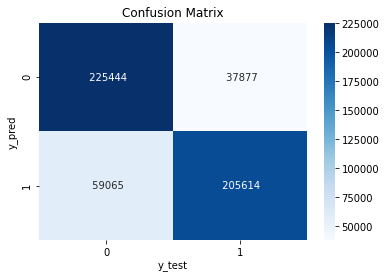

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82    263321
           4       0.84      0.78      0.81    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000

